<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be performing data wrangling.


## Objectives


In this lab you will perform the following:


-   Identify duplicate values in the dataset.

-   Remove duplicate values from the dataset.

-   Identify missing values in the dataset.

-   Impute the missing values in the dataset.

-   Normalize data in the dataset.


<hr>


## Hands on Lab


Import pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")

## Finding duplicates


In this section you will identify duplicate values in the dataset.


 Find how many duplicate rows exist in the dataframe.


In [6]:
# your code goes here
df.duplicated(keep='first').sum()
df.duplicated('Respondent').sum()

154

## Removing duplicates


Remove the duplicate rows from the dataframe.


In [7]:
# your code goes here
df.drop_duplicates(ignore_index=True, inplace=True)

Verify if duplicates were actually dropped.


In [11]:
# your code goes here
print('There are ',df.duplicated().sum(), ' duplicatd rows in the dataset.')

There are  0  duplicatd rows in the dataset.


## Finding Missing values


Find the missing values for all columns.


In [12]:
# your code goes here
df.isnull().sum()

Respondent        0
MainBranch        0
Hobbyist          0
OpenSourcer       0
OpenSource       81
               ... 
Sexuality       542
Ethnicity       675
Dependents      140
SurveyLength     19
SurveyEase       14
Length: 85, dtype: int64

Find out how many rows are missing in the column 'WorkLoc'


In [16]:
# your code goes here
print('There are ',df['WorkLoc'].isnull().sum(),' rows missing in the WorkLoc column.')

There are  32  rows missing in the WorkLoc column.


## Imputing missing values


Find the  value counts for the column WorkLoc.


In [23]:
# your code goes here
print('There are ',df['WorkLoc'].nunique(),' unique values in WorkLoc.')
df['WorkLoc'].value_counts()

There are  3  unique values in WorkLoc.


Office                                            6806
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: WorkLoc, dtype: int64

Identify the value that is most frequent (majority) in the WorkLoc column.


In [38]:
#make a note of the majority value here, for future reference
#Impute (replace) all the empty rows in the column WorkLoc with the value that you have identified as majority.
df["WorkLoc"].fillna(value="Office",inplace=True)  
WorkLoc_majority = 'Office'
print('Majority Value in WorkLoc is Office which has mean',df['ConvertedComp'].mean())
print('Majority Value in WorkLoc is Office which has median',df['ConvertedComp'].median())


Majority Value in WorkLoc is Office which has mean 131596.7316197316
Majority Value in WorkLoc is Office which has median 57745.0


Impute (replace) all the empty rows in the column WorkLoc with the value that you have identified as majority.


In [39]:
# your code goes here
WorkLoc_majority = 'Office'
df['WorkLoc'].fillna(WorkLoc_majority, inplace=True)

After imputation there should ideally not be any empty rows in the WorkLoc column.


Verify if imputing was successful.


In [42]:
# your code goes here
print('After replacing missing values with majority value \n')
print('There are ',df['WorkLoc'].isnull().sum(),' empty rows in WorkLoc') 

After replacing missing values with majority value 

There are  0  empty rows in WorkLoc


## Normalizing data


There are two columns in the dataset that talk about compensation.

One is "CompFreq". This column shows how often a developer is paid (Yearly, Monthly, Weekly).

The other is "CompTotal". This column talks about how much the developer is paid per Year, Month, or Week depending upon his/her "CompFreq". 

This makes it difficult to compare the total compensation of the developers.

In this section you will create a new column called 'NormalizedAnnualCompensation' which contains the 'Annual Compensation' irrespective of the 'CompFreq'.

Once this column is ready, it makes comparison of salaries easy.


<hr>


List out the various categories in the column 'CompFreq'


In [44]:
# your code goes here
df['CompFreq'].value_counts()

Yearly     6073
Monthly    4788
Weekly      331
Name: CompFreq, dtype: int64

Create a new column named 'NormalizedAnnualCompensation'. Use the hint given below if needed.


Double click to see the **Hint**.

<!--

Use the below logic to arrive at the values for the column NormalizedAnnualCompensation.

If the CompFreq is Yearly then use the exising value in CompTotal
If the CompFreq is Monthly then multiply the value in CompTotal with 12 (months in an year)
If the CompFreq is Weekly then multiply the value in CompTotal with 52 (weeks in an year)

-->


100000.0

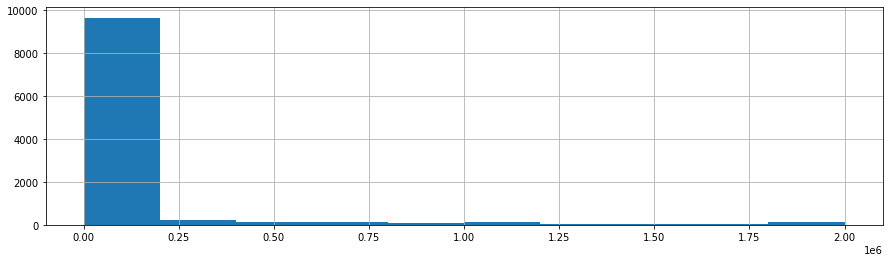

In [47]:
# your code goes here
df.loc[df['CompFreq'] == 'Yearly', 'NormalizedAnnualCompensation']  = 1  * df['CompTotal']
df.loc[df['CompFreq'] == 'Monthly', 'NormalizedAnnualCompensation'] = 12 * df['CompTotal']
df.loc[df['CompFreq'] == 'Weekly', 'NormalizedAnnualCompensation']  = 52 * df['CompTotal']


df[['CompTotal','CompFreq','NormalizedAnnualCompensation']].head(20)
 
df["Respondent"].nunique()
df["ConvertedComp"].describe()
df["ConvertedComp"].hist(figsize=(15,4))
df['NormalizedAnnualCompensation'].median()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
